## explore data

In [1]:
# make imports 
import numpy as np
import pandas as pd

In [2]:
# read data from tsv file:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv',sep='\t')

# read data description:
with open("../TextFiles/sms_readme.txt", encoding = 'utf-8') as f:
    readme=f.read()

In [3]:
#print(readme)
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

As we see there is no null rows so we can continue exploring data

In [13]:
print("length: ",len(df))
print("\nUnique labels:\n",df['label'].unique(),sep="")
print("\nlabels' value count:\n",df['label'].value_counts(),sep="")

length:  5572

Unique labels:
['ham' 'spam']

labels' value count:
ham     4825
spam     747
Name: label, dtype: int64


## Make some visualization

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

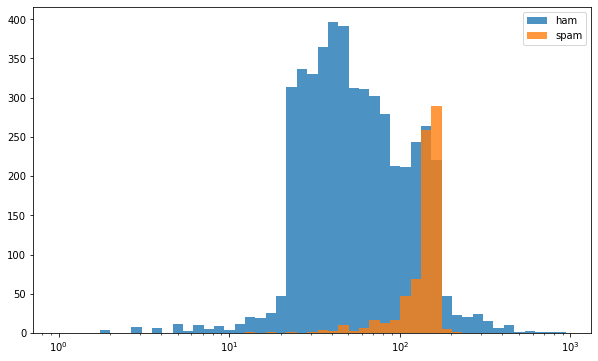

In [15]:
plt.figure(figsize=(10,6))
plt.xscale('log')
bins=1.15**(np.arange(50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

We see that longer messages tend to be spam

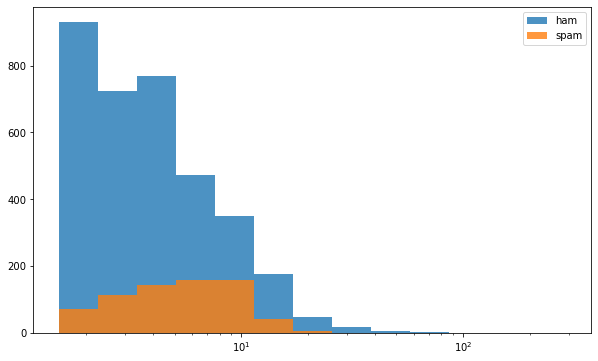

In [16]:
plt.figure(figsize=(10,6))
plt.xscale('log')
bins=1.5**(np.arange(1,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

For Puctuatuion there is no significant trend

## Create model for length and punctuation

In [17]:
# for splitting data import:
from sklearn.model_selection import train_test_split

In [18]:
# X feature data
X = df[['length','punct']]
# y is our label
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
from sklearn import metrics
# make predictions:
predictions=model.predict(X_test)
print("confusion matrix: \n")
print(metrics.confusion_matrix(y_test,predictions))
print("\n")
print("Classification report:\n")
print(metrics.classification_report(y_test,predictions))
print("accuracy score: ",metrics.accuracy_score(y_test,predictions))

confusion matrix: 

[[1437   38]
 [ 191    6]]


Classification report:

              precision    recall  f1-score   support

         ham       0.88      0.97      0.93      1475
        spam       0.14      0.03      0.05       197

    accuracy                           0.86      1672
   macro avg       0.51      0.50      0.49      1672
weighted avg       0.79      0.86      0.82      1672

accuracy score:  0.8630382775119617


As we see from results, model can't predict well with length and punctuation

## Feature extraction from text

In [29]:
# split again but now use "message" column 

X = df['message']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Build a Pipeline
Remember that only our training set has been vectorized into a full vocabulary. In order to perform an analysis on our test set we'll have to submit it to the same procedures. Fortunately scikit-learn offers a [**Pipeline**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class that behaves like a compound classifier.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [32]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [33]:
# let's make prediction from other data:
spam_text="""
 Pension reviews
Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review. To opt out reply STOP
"""


text_clf.predict([spam_text])

array(['spam'], dtype=object)

model made correct prediction

In [34]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[1470    5]
 [  21  176]]


In [35]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1475
        spam       0.97      0.89      0.93       197

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [37]:
# Print the overall accuracy
score=metrics.accuracy_score(y_test,predictions)
print(score)

0.9844497607655502


Using the text of the messages, our model performed exceedingly well; it correctly predicted spam 0.9844% of the time!Now let's apply what we've learned to a text classification project involving positive and negative movie reviews.
